# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, непрерывный по времени.

**Дискретный сигнал** — это сигнал, дискретный по времени и непрерывный по состоянию.

**Цифровой сигнал** — это сигнал, дискретный и по времени, и по состоянию.

**Линейная комбинация** — это выражение, построенное на множестве элементов путём умножения каждого элемента на коэффициенты с последующим сложением результатов.

**Среднее значение дискретного сигнала**: $M = \frac{\sum_{k=0}^{N}x(k)}{N}$.

**Энергия дискретного сигнала**: $E = \sum_{k=0}^{N}|x(k)|^2$.

**Средняя мощность дискретного сигнала**: $P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$.

**Огибающая сигнала** — это функция, описывающая изменения амплитуды сигнала во времени.

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Начальные условия:

|Переменная|Назначение|Значение|Идентификатор|
|    :----:   |    :----:   |    :----:   |    :----:   |
|$N_{бр}$  |Номер бригады           |8                    |Nb|
|$N$       |Длина последовательности|33                   |N|
|$a$       |Основание экспоненты    |0.84                |a|
|$C$       |Амплитуда гармонического сигнала       |4|C      |  
|$\hat\omega_0$(рад)|Частота гармонического сигнала|π/9|w0|
|$U$|Амплитуда импульса|8| U|
|$n_0$|Начальный момент импульса|6|n0|
|$n_{imp}$|Длина импульса|8|n_imp|
|$B_1$|Амплитуда гармонических сигналов|4.5|B1|
|$B_2$|Амплитуда гармонических сигналов|2.7|B2|
|$B_3$|Амплитуда гармонических сигналов|5.2|B3|
|$\hat\omega_1$|Частоты гармонических сигналов|π/7|w1|
|$\hat\omega_2$|Частоты гармонических сигналов|π/11|w2|
|$\hat\omega_3$|Частоты гармонических сигналов|π/19|w3|
|$a_1$       |Коэффициент линейной комбинации гармонических сигналов    |-1.5                |a1|
|$a_2$       |Коэффициент линейной комбинации гармонических сигналов    |3.7                |a2|
|$a_3$       |Коэффициент линейной комбинации гармонических сигналов    |4.4                |a3|

Импорт необходимых библиотек и определение начальных условий:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

initialConditions = {
    'Nb': 8,
    'N': 33,
    'a': 0.84,
    'C': 4,
    'w0': pi/ 9,
    'U': 8,
    'n0': 6,
    'n_imp': 8,
    'B1': 4.5,
    'B2': 2.7,
    'B3': 5.2,
    'w1': pi / 7,
    'w2': pi / 11,
    'w3': pi / 19,
    'a1': -1.5,
    'a2': 3.7,
    'a3': 4.4,
}

### 1. На основе дискретного единичного скачка $\sigma_d(k)$ смоделируем дискретный прямоугольный импульс:

$s_1(k)= \begin{cases}U_n, & n_0 \le k \le n_0+n_{imp}-1\\0, & else\end{cases}$

где $U_n = U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$

Таким образом, прямоугольный импульс моделируется как линейная комбинация двух единичных скачков с задержкой.

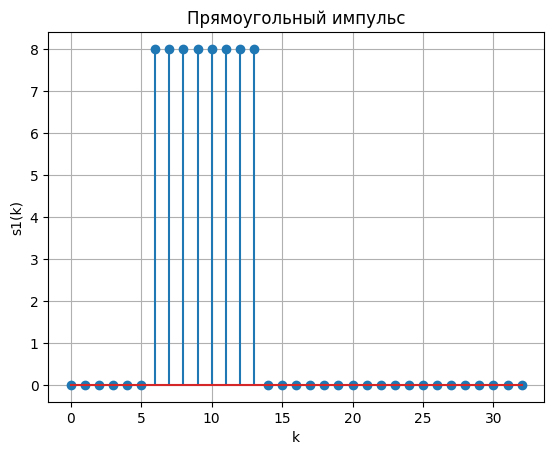

In [9]:
n = np.linspace(0, initialConditions['N'] - 1, initialConditions['N'])

# Дискретный единичный скачок
def hsf(k, m=0):
  var = np.zeros_like(k)
  var[k >= m] = 1
  return var

# Генерируем прямоугольный импульс
def s1(k):
  shift_1 = hsf(k - initialConditions['n0'])
  shift_2 = hsf(k - initialConditions['n0'] - initialConditions['n_imp'])
  return initialConditions['U']*(shift_1 - shift_2)

plt.stem(n, s1(n))
plt.title("Прямоугольный импульс")
plt.xlabel('k')
plt.ylabel('s1(k)')
plt.grid()
plt.show()

### 2. Смоделируем линейную комбинацию дискретных гармонических сигналов $s_2(k)$ с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n∈[0, 5N - 1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$(идентификатор P).
$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$ где
$x_i(k) = B_isin(\widehat{\omega}_i k),\quad i = 1, 2, 3$

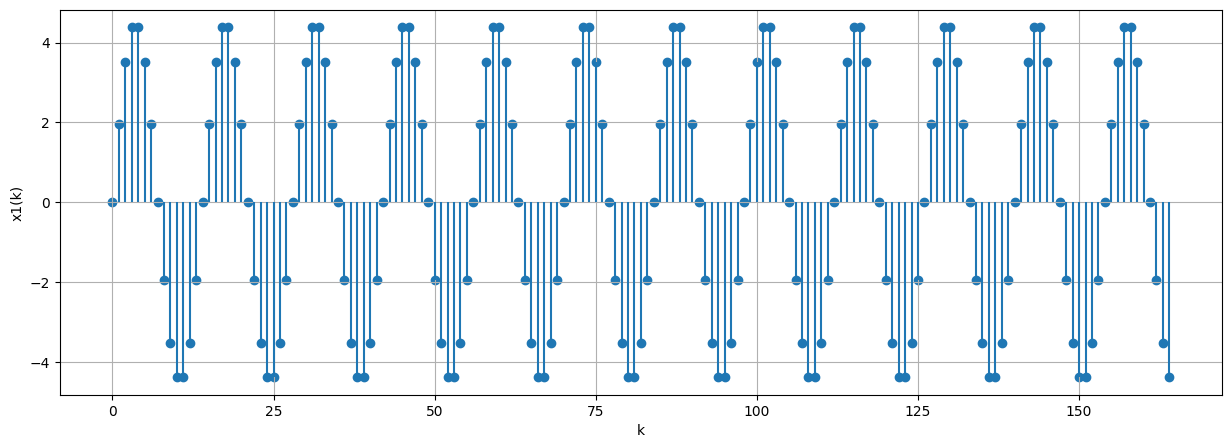

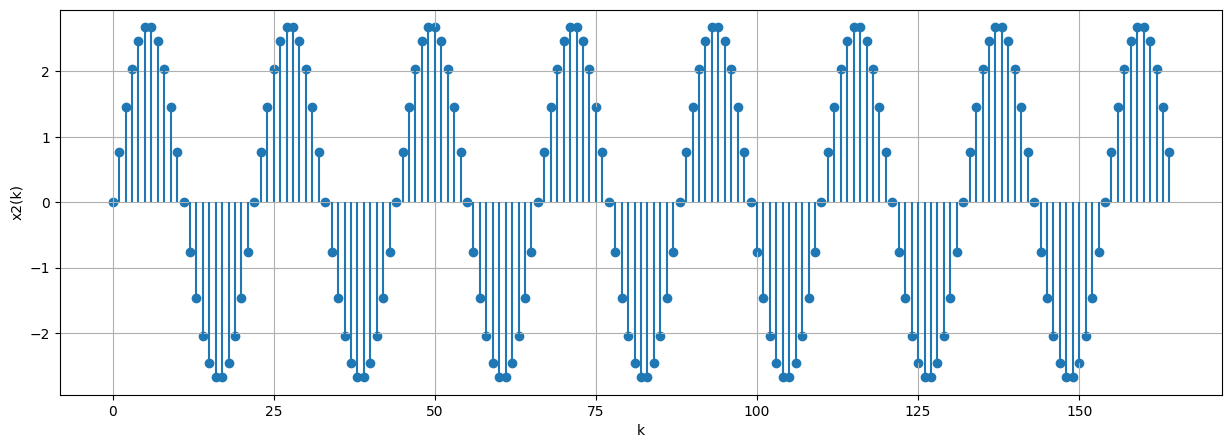

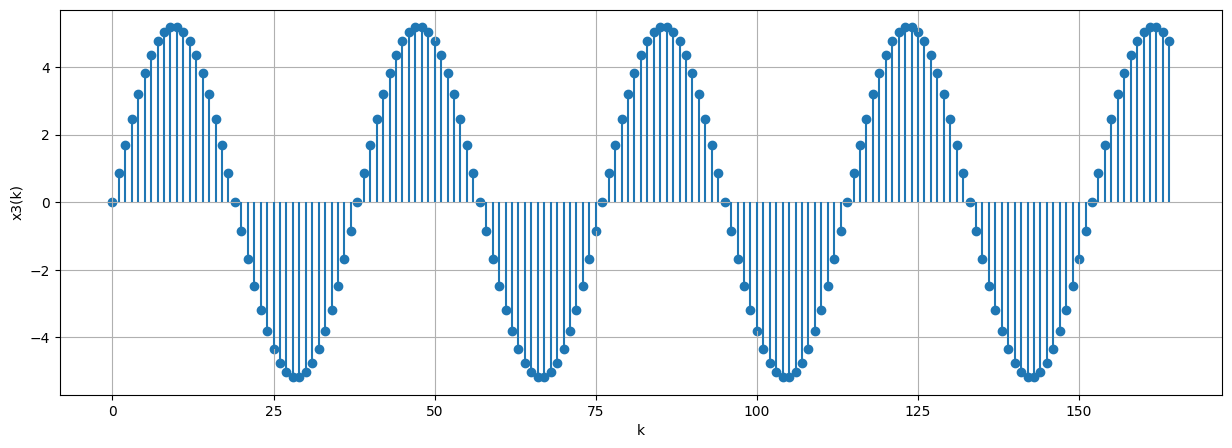

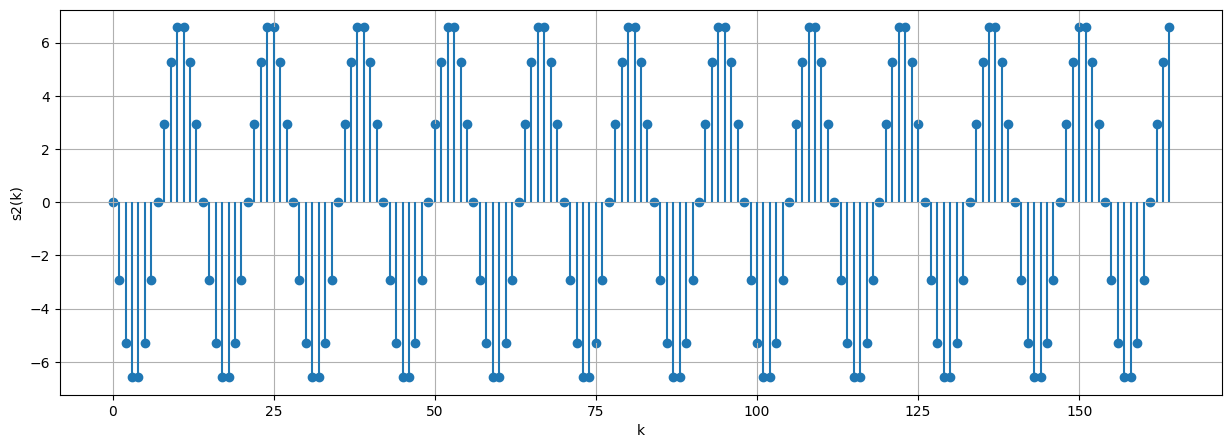

mean_s2 = -0.08961721910866706
E = 3747.515624999999
P = 22.712215909090904


In [11]:
x1 = lambda k: initialConditions['B1'] * sin(initialConditions['w1'] * k)
x2 = lambda k: initialConditions['B2'] * sin(initialConditions['w2'] * k)
x3 = lambda k: initialConditions['B3'] * sin(initialConditions['w3'] * k)

def s2(k):
  return initialConditions['a1'] * x1(k)
  + initialConditions['a2'] * x2(k)
  + initialConditions['a3'] * x3(k)

def show(interval, fn, ylabel):
  plt.figure(figsize=(15,5))
  plt.scatter(interval, [fn(k) for k in interval])
  plt.vlines(interval, 0, [fn(k) for k in interval])
  plt.xlabel('k')
  plt.ylabel(ylabel)
  plt.grid()
  plt.show()

n = np.linspace(0, 5 * initialConditions['N'] - 1, 5 * initialConditions['N'])

show(n, x1, 'x1(k)')
show(n, x2, 'x2(k)')
show(n, x3, 'x3(k)')
show(n, s2, 's2(k)')

mean_s2 = np.sum([s2(k) for k in n]) / (5 * initialConditions['N'])
E = np.sum([s2(k)**2 for k in n])
P = E / (5 * initialConditions['N'])

print(f'mean_s2 = {mean_s2}')
print(f'E = {E}')
print(f'P = {P}')

#### Пояснение
a. Для получения амплитуды комбинации сигналов в каждом отсчёте необходимо суммировать амплитуды гармонических функций $x_i(k)$, умноженные на соответствующие коэффициенты линейной комбинации гаронических сигналов $a_i$.

b. Указанные характеристики определяются следующим образом:
- Среднее значение: $$ M_{s2(k)} = \frac{\sum_{k=0}^{5N-1}{s_2(k)}}{5N} $$
- Энергия: $$ E = \sum_{k=0}^{5N-1}{s_2^2(k)} $$
- Средняя мощность: $$ P = \frac{E}{5N} $$

###3. Смоделируем дискретный сигнал $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)=C\cos(\hatω_0k)$ с экспоненциальной огибающей $|a|^k$ на интервале времени $n \in [0, N-1]$.

Чтобы гармонический сигнал огибался указанной экспонентой, он должен быть смоделирован следующим образом:

$s_3(k)=C\cos(\hatω_0k)*|a|^k$

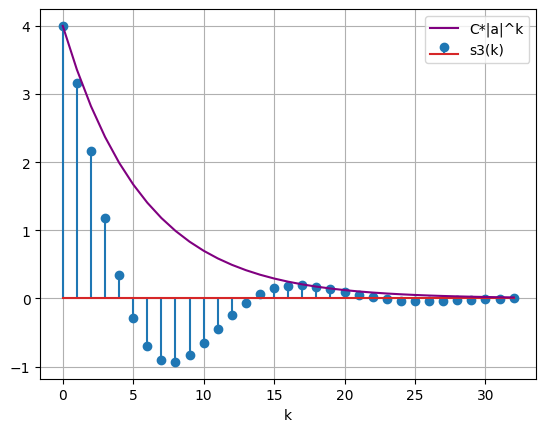

In [12]:
n = np.linspace(0, initialConditions['N'] - 1, initialConditions['N'])

def s3(k):
  return initialConditions['C']*np.cos(initialConditions['w0']*k)*(abs(initialConditions['a']))**k

plt.stem(n, s3(n), label='s3(k)')
plt.plot(initialConditions['C']*(abs(initialConditions['a']))**n, color='purple', label='C*|a|^k')
plt.xlabel('k')
plt.legend()
plt.grid()
plt.show()

### 4. Смоделируем периодическую последовательность $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса:
$s_4(k)=\sum_{i=0}^{N} s_1(k-iT),\qquad\qquad (1)$

где $N$ — кол-во периодов, $T = 2n_{imp}$ — период

За основу берётся прямоугольный импульс $s_1(k)$  

Но, в силу требования о периодичности функции, необходимо чтобы $s_1(k)$ равнялось $U$ не только на интервале $[n_0;n_0+n_{imp}-1]$, но и на интервалах $[n_0 + iT;n_0+n_{imp}-1 + iT]$, где $i∈ℕ$.


Отсюда несложно получить формулу $(1)$

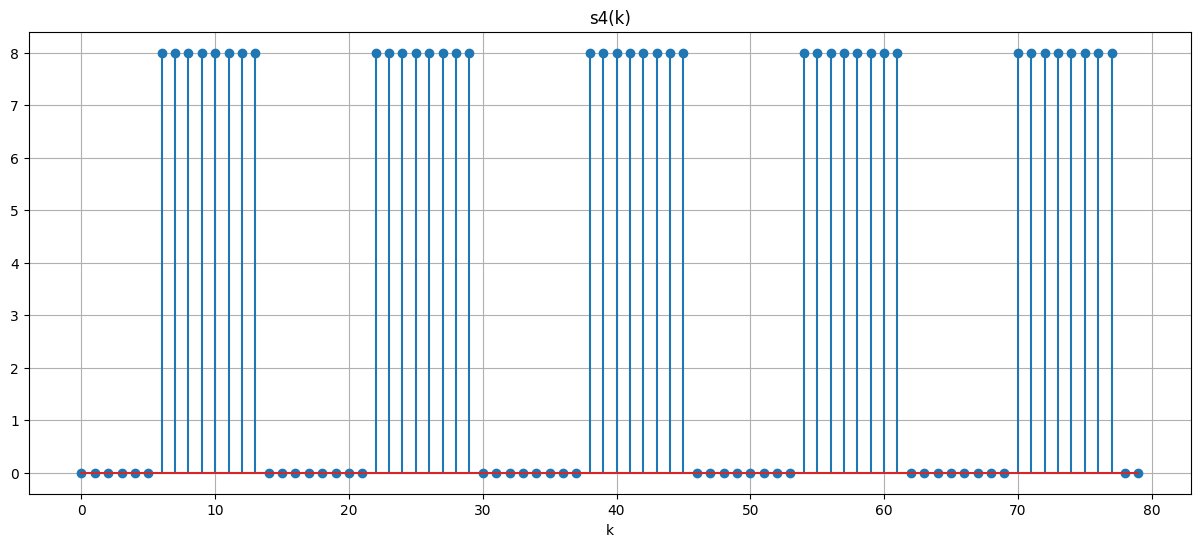

In [15]:
T = 2 * initialConditions['n_imp']

interval = np.linspace(0, 5 * T - 1, 5 * T)

def s4(k, T, N):
  return sum([s1(k-i*T) for i in range(N)])

plt.figure(figsize=(15,6))
plt.stem(interval, s4(interval, T, 5))
plt.grid()
plt.xlabel('k')
plt.title('s4(k)')
plt.show()

## Выводы

В ходе выполнения лабораторной работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов и проведены их моделирование и анализ. Результаты получены следующие:

1. С помщью линейной комбинации единичных скачков получен новый сигнал — прямоугольный импульс
2. С помощью линейной комбинации исходных гармонических сигналов получен новый гармонический сигнал с другими характеристиками
3. С помощью линейной комбинации получен гармонический сигнал с заданной огибающей
4. С помощью линейной комбинации из непериодического сигнала получен периодический

Таким образом, с помощью линейных комбинаций можно получать сигналы разной природы.